### Decision Tree Company Sales

#### Required Libraries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [94]:
import warnings 
warnings.filterwarnings('ignore')

In [95]:
company = pd.read_csv("F:RStudio/excelR/assignments/Assignment 14 decision tree/Company_Data.csv")

In [96]:
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [97]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [98]:
company['Sales_Range'] = pd.cut(company.Sales,bins=[0,3,6,10,14,20],
                                     labels=['Poor','Below_Avg','Avg','Above_Avg','Outstanding'],include_lowest=True)

In [99]:
label_encoder = preprocessing.LabelEncoder()
company_data = company[['ShelveLoc', 'Urban','US']].apply(label_encoder.fit_transform)
company_data = company_data.rename(columns={'ShelveLoc':'ShelveLoc_num', 'Urban':'Urban_num','US':'US_num'})

In [100]:
company_data.head()

ShelveLoc_num  Urban_num  US_num
0              0          1       1
1              1          1       1
2              2          1       1
3              2          1       1
4              0          1       0

In [101]:
company_data = pd.concat([company,company_data], axis=1, sort=False)
company_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_Range  ShelveLoc_num  Urban_num  US_num  
0         17   Yes  Yes         Avg              0          1       1  
1         10   Yes  Yes   Above_Avg              1          1       1  
2         12   Yes  Yes   Above_Avg              2          1       1  
3         14   Yes  Yes         Avg              2          1       1  
4         13   Yes   No   Below_Avg              0          1       0

In [102]:
company_data =company_data.drop(columns={'Sales','ShelveLoc','Urban','US'},axis=1)

In [103]:
company_data = company_data[["CompPrice","Income","Advertising","Population","Price","Age",
                             "Education","ShelveLoc_num","Urban_num","US_num","Sales_Range"]]

In [104]:
company_data.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_num  Urban_num  US_num Sales_Range  
0              0          1       1         Avg  
1              1          1       1   Above_Avg  
2              2          1       1   Above_Avg  
3              2          1       1         Avg  
4              0          1       0   Below_Avg

In [105]:
colnames=list(company_data.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_num',
 'Urban_num',
 'US_num',
 'Sales_Range']

In [106]:
company_data['Sales_Range'].unique()

['Avg', 'Above_Avg', 'Below_Avg', 'Outstanding', 'Poor']
Categories (5, object): ['Poor' < 'Below_Avg' < 'Avg' < 'Above_Avg' < 'Outstanding']

In [107]:
company_data.Sales_Range.value_counts()

Avg            192
Below_Avg      113
Above_Avg       74
Poor            17
Outstanding      4
Name: Sales_Range, dtype: int64

In [108]:
company_data.isnull().sum()

CompPrice        0
Income           0
Advertising      0
Population       0
Price            0
Age              0
Education        0
ShelveLoc_num    0
Urban_num        0
US_num           0
Sales_Range      0
dtype: int64

### Visulazing the distribution of the data for every feature

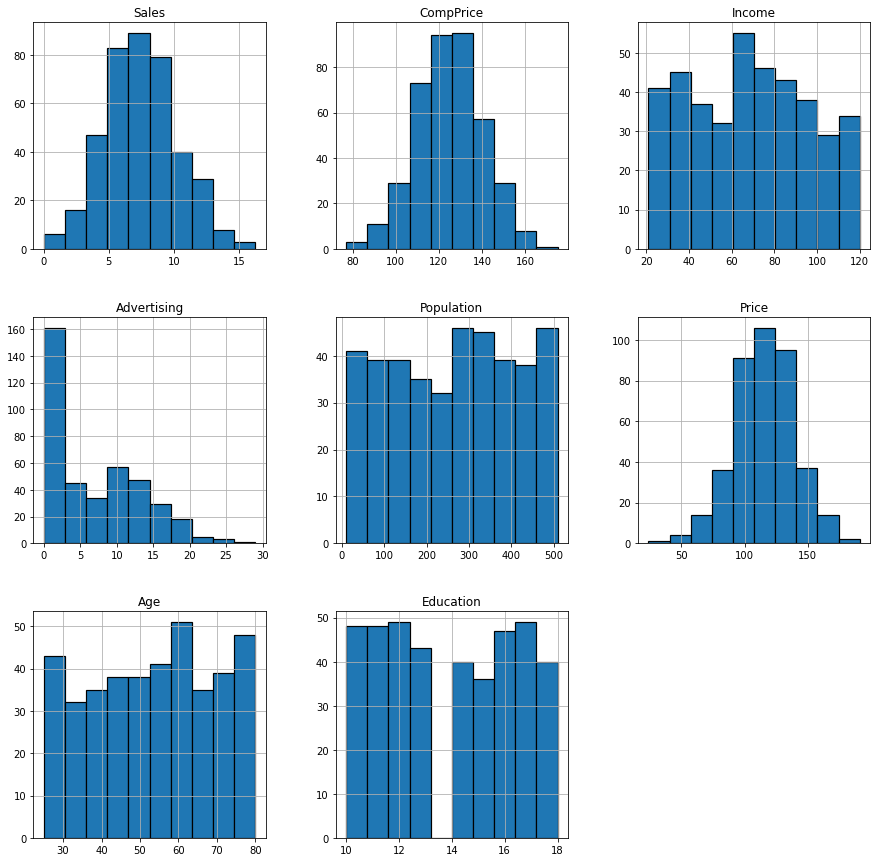

In [109]:
company.hist(edgecolor='black', linewidth=1.2, figsize=(15, 15));

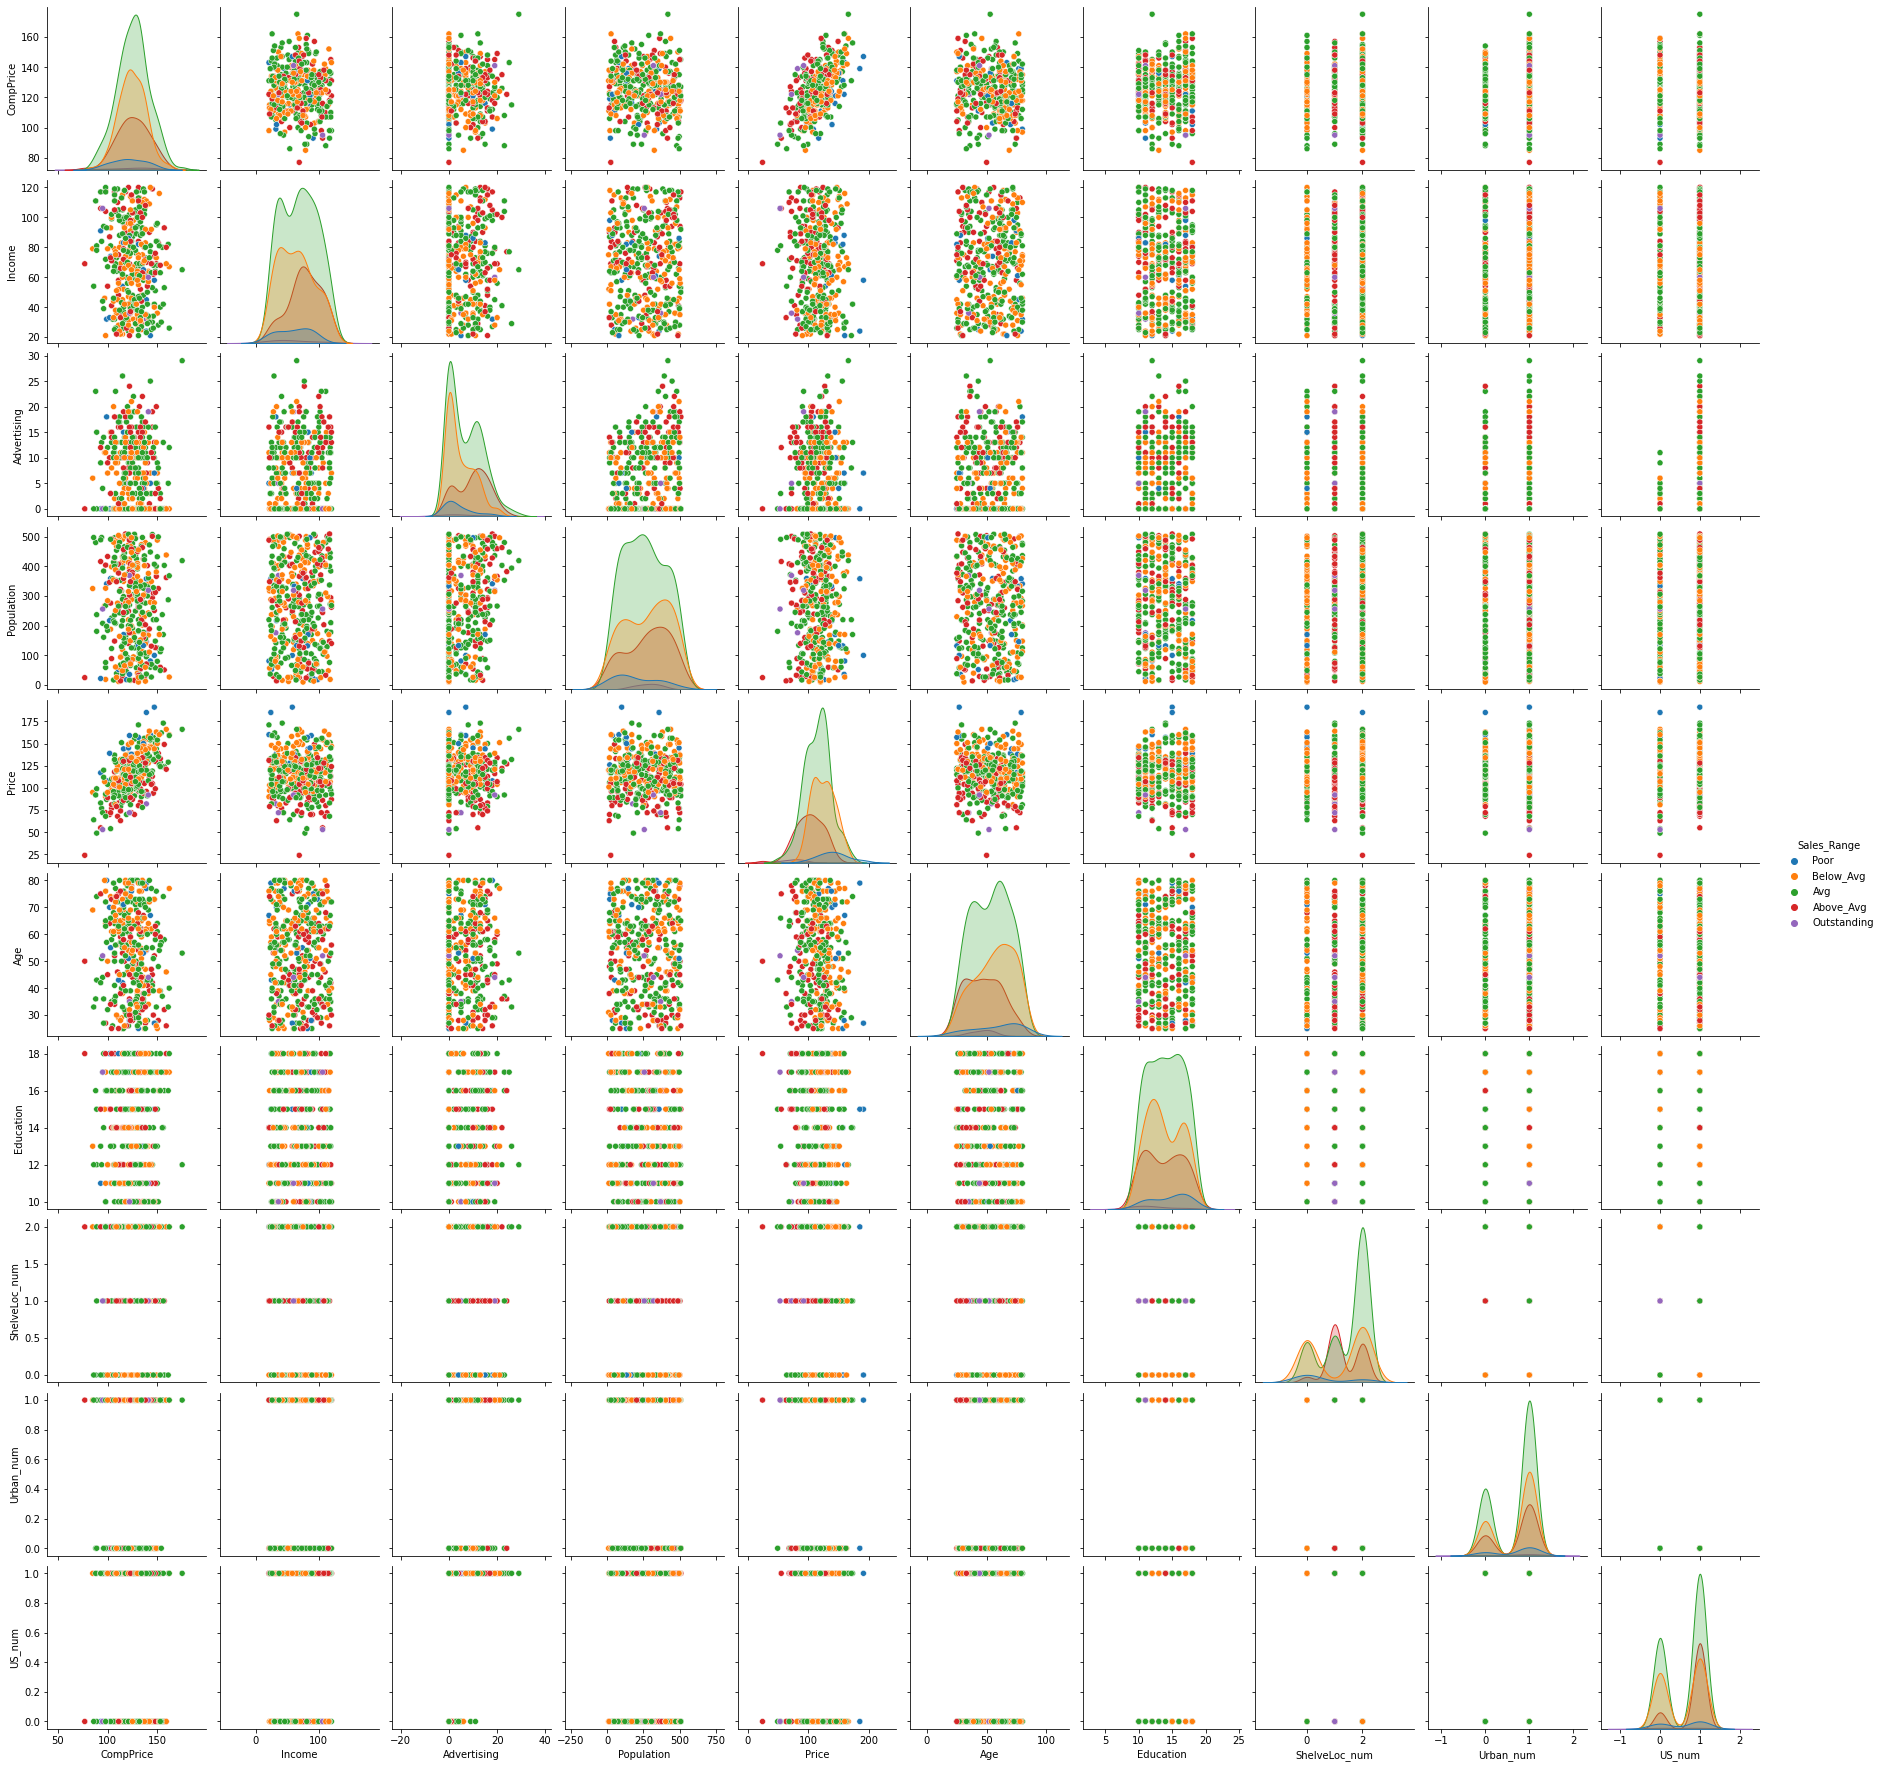

In [110]:
import seaborn as sns
sns.pairplot(company_data,hue='Sales_Range')

In [111]:
x=company_data.iloc[:,0:10]
y=company_data['Sales_Range']

In [112]:
x

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_num  Urban_num  US_num  
0                0          1       1  
1                1          1       1  
2                2          1       1  
3                2          1       1  
4                0          1       0  
..             ...        ...     ...  
395              1          1       1  
396              2          0       1  
397              2          1       1  
398              0          1       1  
399              1          1       1  

[400 rows x 10 columns]

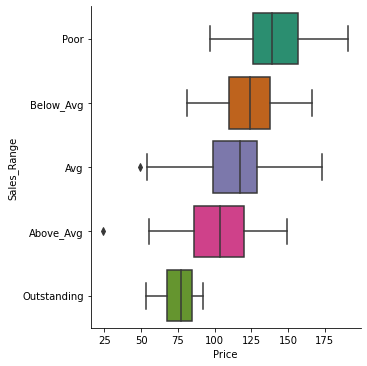

In [367]:
sns.catplot(x='Price',y='Sales_Range',data=company,kind='box',palette='Dark2')


###### Here also after seeing different boxplot we found this information that which boxplot comes under the sales range of the company.

<AxesSubplot:>

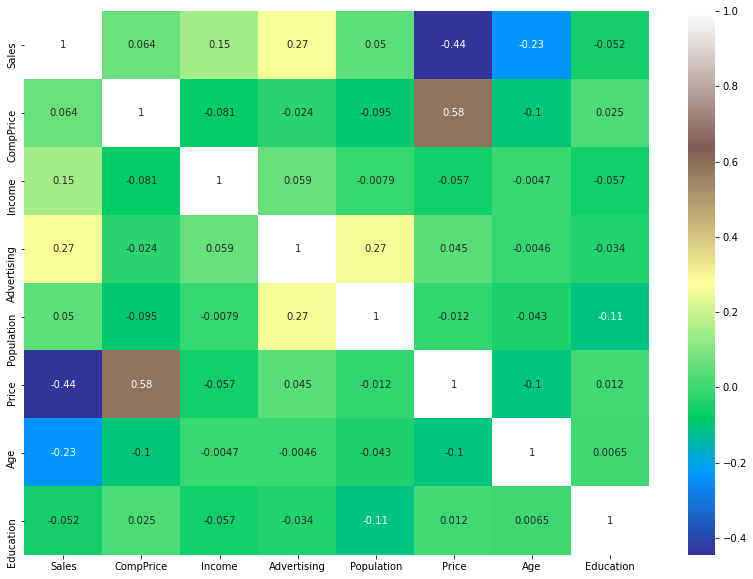

In [369]:
plt.figure(figsize=(14,10))
sns.heatmap(company.corr(),annot=True,cmap='terrain')

### Splitting data into training and testing data set

In [113]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

#### Building Decision Tree Classifier using Entropy Criteria

In [114]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

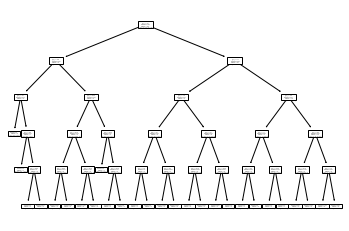

In [115]:
#PLot the decision tree
tree.plot_tree(model);

In [116]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_num',
 'Urban_num',
 'US_num']
cn=['Poor','Below_Avg','Avg','Above_Avg','Outstanding']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2.5,2.5), dpi=5000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [117]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Avg            41
Below_Avg      18
Above_Avg      17
Outstanding     3
Poor            1
dtype: int64

In [118]:
preds

array(['Above_Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Below_Avg', 'Above_Avg',
       'Avg', 'Avg', 'Outstanding', 'Avg', 'Avg', 'Avg', 'Avg',
       'Above_Avg', 'Below_Avg', 'Avg', 'Avg', 'Avg', 'Below_Avg',
       'Above_Avg', 'Above_Avg', 'Avg', 'Above_Avg', 'Avg', 'Below_Avg',
       'Above_Avg', 'Below_Avg', 'Above_Avg', 'Above_Avg', 'Avg', 'Avg',
       'Outstanding', 'Avg', 'Avg', 'Avg', 'Above_Avg', 'Below_Avg',
       'Below_Avg', 'Avg', 'Avg', 'Below_Avg', 'Below_Avg', 'Avg', 'Avg',
       'Above_Avg', 'Below_Avg', 'Avg', 'Avg', 'Below_Avg', 'Below_Avg',
       'Avg', 'Above_Avg', 'Avg', 'Poor', 'Outstanding', 'Avg', 'Avg',
       'Avg', 'Below_Avg', 'Below_Avg', 'Avg', 'Above_Avg', 'Avg',
       'Below_Avg', 'Avg', 'Above_Avg', 'Below_Avg', 'Avg', 'Above_Avg',
       'Above_Avg', 'Above_Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Below_Avg',
       'Avg', 'Avg', 'Below_Avg'], dtype=object)

In [119]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0        Above_Avg  Avg  Below_Avg  Outstanding  Poor
Sales_Range                                              
Poor                 0    0          4            0     0
Below_Avg            0   12         10            0     1
Avg                 11   24          4            0     0
Above_Avg            6    5          0            3     0

In [120]:
np.mean(preds==y_test)

0.5

# Bagging Technique

In [202]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix

In [203]:
seed = 7

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)

In [204]:
model.fit(x_train, y_train);

In [205]:
confusion_matrix(y_test,model.predict(x_test))

array([[10,  4,  0,  0],
       [ 7, 28,  4,  0],
       [ 0,  8, 14,  1],
       [ 0,  1,  3,  0]], dtype=int64)

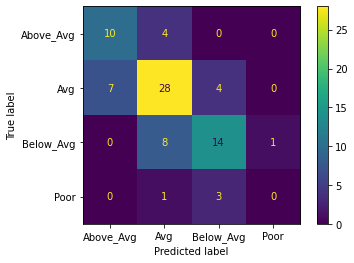

In [206]:
plot_confusion_matrix(model,x_test,y_test)

In [207]:
accuracy_score(y_test,model.predict(x_test))

0.65

###### Using Bagging Technique we ontained 65% accuracy

# Random Forest

In [321]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [322]:
num_trees = 400
max_features = 4
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [323]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=400)

In [324]:
accuracy_score(y_test,model.predict(x_test))

0.6

In [325]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 8,  6,  0,  0],
       [ 7, 29,  3,  0],
       [ 0, 12, 11,  0],
       [ 0,  1,  3,  0]], dtype=int64)

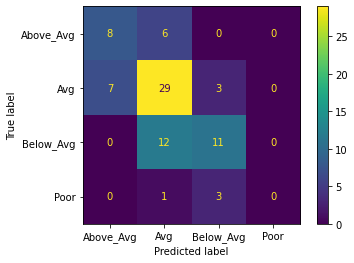

In [326]:
plot_confusion_matrix(model,x_test,y_test)

###### Using Random Forest we obtained 60% accuracy

# Ada Boost

In [345]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [346]:
num_trees = 30
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)

In [347]:
model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=30)

In [348]:
accuracy_score(y_test,model.predict(x_test))

0.5

In [349]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 5,  9,  0,  0],
       [ 7, 29,  3,  0],
       [ 0, 17,  6,  0],
       [ 0,  3,  1,  0]], dtype=int64)

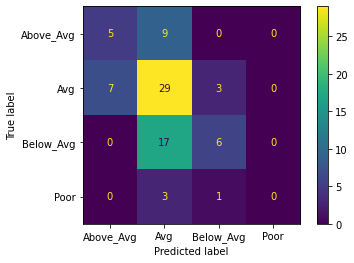

In [350]:
plot_confusion_matrix(model,x_test,y_test)

###### Using AdaBoost we obtained 50% accuracy

# XG Boost

In [361]:
from xgboost import XGBClassifier

In [362]:
model = XGBClassifier()
model.fit(x_train, y_train)

[17:12:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [363]:
y_pred = model.predict(x_test)
predictions = [value for value in y_pred]

In [364]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.50%


In [365]:
predictions

['Avg',
 'Below_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Above_Avg',
 'Avg',
 'Avg',
 'Above_Avg',
 'Below_Avg',
 'Below_Avg',
 'Below_Avg',
 'Avg',
 'Above_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Below_Avg',
 'Above_Avg',
 'Above_Avg',
 'Avg',
 'Above_Avg',
 'Below_Avg',
 'Below_Avg',
 'Avg',
 'Below_Avg',
 'Above_Avg',
 'Above_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Poor',
 'Above_Avg',
 'Above_Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Below_Avg',
 'Below_Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Avg',
 'Above_Avg',
 'Above_Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Below_Avg',
 'Below_Avg',
 'Avg']

In [366]:
company.to_csv('auto(b).csv')

#### Result:

Decision trees with different parameters have been tried out and the best possible outcomes have been obtained.

Here also after seeing different boxplot we found this information that which boxplot comes under the sales range of the company.

Here I applied many ensemble techniques and I got a high accuracy score of 67.50% in XG Boost for making the best model in the Fraud Check Dataset.